# Mayer vs Johnston vs our data

In this notebook we analyze the proteins in the Johnston and Mayer papers. First, we extract their total and differential proteins. We then make a venn diagram comparing the total proteins in each paper to the total proteins we found. We also calculate the percent of their differential we identify.

In [1]:
johnston_file = "testing/data/134638_0_supp_38937_p0y7zb.xlsx"
mayer_file = "testing/data/133399_0_supp_15943_4ybsvb.xlsx"

In [2]:
import pandas as pd
import requests
import os.path
import os
from os import path
from numpy import log10
from gprofiler import GProfiler
import longitudinalCLL
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Mayer Paper

Dowload and import supplementary table 3, use after imputation sheets (Mayer et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5795392/bin/supp_RA117.000425_133399_0_supp_15943_4ybsvb.xlsx

I parse the dataframe and extract all the names of identified proteins and differential (+ in t-test).
There are 6, 945 total proteins identified in the paper.

Since this paper differentiated between nuclear and cytoplasmic, we have to read in 2 files. First, we pull the nuclear file and extract the significant proteins.

In [3]:
ne_sheet_name = "NE_after imputation"
#The other is "NE_before imputation"
m_ne_df = pd.read_excel(mayer_file, sheet_name = ne_sheet_name)

In [4]:
m_sig_ne = m_ne_df.loc[m_ne_df['Student\'s t-test Significant CLL vs elderly Bcells'] == '+']

Next, we pull the cytoplasmic file and extract the significant proteins.

In [5]:
mayer_cyt_sheet_name = "CYT_after imputation"
m_cyt_df = pd.read_excel(mayer_file, sheet_name= mayer_cyt_sheet_name,
                         skiprows = 1) #There is a header saying sup. table s3

In [6]:
m_sig_cyt = m_cyt_df.loc[m_cyt_df['Student\'s t-test Significant CLL vs elderly B cells'] == '+']

In [7]:
m_diff = []

In [8]:
sig_frames = [m_sig_ne, m_sig_cyt]
sig = pd.concat(sig_frames)

In [9]:
for protein in sig['Protein IDs'] :
    temp = protein.split(";")
    m_diff.append(temp[0])

The following cells extract all the proteins identified

In [10]:
m_tot = []

In [11]:
frames = [m_ne_df, m_cyt_df]
m_t = pd.concat(frames)

In [12]:
m_t.dropna(subset = ['Protein IDs'], inplace = True)

In [13]:
for protein in m_t['Protein IDs']:
    temp = protein.split(";")
    m_tot.append(temp[0])

Save to a file

In [14]:
#m_diff.to_csv('data/m_diff.csv')
#m_tot.to_csv('data/m_tot.csv')

## Johnston Paper
Download and import supplementary table 2 (Johnston et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5880099/bin/supp_RA117.000539_134638_0_supp_38937_p0y7zb.xlsx

I parse the dataframe and extract all the names of identified and differential proteins.

In [15]:
j_sheet_name = "CLL proteome"
j_df = pd.read_excel(johnston_file, sheet_name = j_sheet_name)

Here I extract all the proteins with a differential regulation score (>0.3 and <-0.3) and all proteins identified.

In [16]:
j_u = j_df.loc[j_df['Regulation score'] >= 0.3]
j_upreg = j_u['Protein group accession']

In [17]:
j_d = j_df.loc[j_df['Regulation score'] <= -0.3]
j_downreg = j_d['Protein group accession']

In [18]:
diff_frames = [j_downreg, j_upreg]
j_diff = pd.concat(diff_frames)

In [19]:
j_tot = j_df['Protein group accession']

Save to a file

In [20]:
#j_diff.to_csv('data/j_diff.csv')
#j_tot.to_csv('data/j_tot.csv')

# Overlap with our paper

First I import and load our data as port

In [21]:
prot = longitudinalCLL.get_proteomic()

prot.load_dataset(version='July_noMBR_FP', subjects = [])

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,2153860.2,5444238.5,5514300.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,2290868.2,2486001.2,2596365.20,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,1958162.5,1604476.4,418360.38,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,0.0,2272656.2,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
Q14C86,0.0,0.0,1139333.0,0.0,0.0,0.0,0.00,994677.5,0.0,632145.70,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1029046.4,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Now I make the data into a dataframe so I can compare it to the other papers

In [22]:
payne_df = prot.data_frame.reset_index()

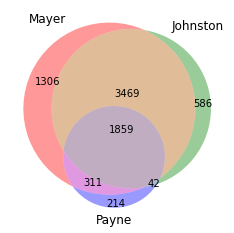

In [23]:
venn3(subsets = (set(m_tot), set(j_tot), set(payne_df['Protein ID'])), set_labels = ('Mayer', 'Johnston', 'Payne'))
#plt.savefig('testing/data/our_overlap.png')
plt.show()

In [24]:
m_diff_ratio = len(set(m_diff).intersection(payne_df['Protein ID']))/len(m_diff)
m_diff_ratio

0.3091118800461361

In [25]:
j_diff_ratio = len(set(j_diff).intersection(payne_df['Protein ID']))/len(j_diff)
j_diff_ratio

0.3465259454705365